<a href="https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Machine%20Learning/05_projects/Loan%20Approval%20Prediction/loan_approval_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Approval Prediction (ML Project)

Predict whether a loan should be approved based on applicant information.

**Goal**: Learn how to process real-world financial data, handle missing values, encode categorical variables, and build a binary classification model.


---

## Dataset: [Loan Prediction Dataset – Kaggle](https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset)

* **Filename**: train.csv

* **Dataset Overview**:

    * Binary classification problem to predict loan approval (`Loan_Status`)

    * 13 columns including:

        * `Gender`, `Married`, `Dependents`, `Education`, `Self_Employed`

        * `ApplicantIncome`, `CoapplicantIncome`, `LoanAmount`, `Loan_Amount_Term`, `Credit_History`

        * `Property_Area`, `Loan_Status`

To use in Google Colab, download train.csv and upload it as loan_data.csv.

## Step 1: Upload Dataset


In [1]:
# Step 1: Upload Dataset
from google.colab import files
import pandas as pd

df = pd.read_csv("loan_data.csv")  # Use 'train.csv' from Kaggle and rename it
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Step 2: Exploratory Data Analysis (EDA)

In [2]:
# Step 2: Exploratory Data Analysis (EDA)
print("Dataset Shape:", df.shape)
print(df.dtypes)

# Distribution of Target
df['Loan_Status'].value_counts()


Dataset Shape: (614, 13)
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


,count
Loan_Status,
Y,422
N,192


## Step 3: Data Preprocessing


Real-world datasets often contain:
- Missing values
- Mixed types (categorical, numeric)
- Non-numeric target variables

We'll:
- Drop unnecessary columns
- Fill missing values
- Encode categorical variables


In [3]:
# Drop ID column
df.drop(columns=["Loan_ID"], inplace=True)

# Fill categorical columns with mode
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill numerical columns with median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

# Encode target column
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

# One-hot encode remaining categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

/tmp/ipython-input-3-3507591710.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-3-3507591710.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,True,False,False,False,False,False,False,False,True
1,4583,1508.0,128.0,360.0,1.0,0,True,True,True,False,False,False,False,False,False
2,3000,0.0,66.0,360.0,1.0,1,True,True,False,False,False,False,True,False,True
3,2583,2358.0,120.0,360.0,1.0,1,True,True,False,False,False,True,False,False,True
4,6000,0.0,141.0,360.0,1.0,1,True,False,False,False,False,False,False,False,True


## Step 4: Train/Test Split

Split data into:
- Training set (80%)
- Testing set (20%)

This helps evaluate model generalization.


In [4]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop("Loan_Status", axis=1)
y = df_encoded["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

## Step 5: Model Training

We'll use:
- Logistic Regression
- Random Forest

These are well-suited for binary classification.


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(random_state=42)

## Step 6: Model Evaluation

Metrics used:
- Accuracy
- Confusion Matrix
- ROC AUC Score
- Precision, Recall, F1-score


\nLogistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123

Logistic Regression ROC AUC Score: 0.8504643962848297
\nRandom Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.63      0.71        38
           1       0.85      0.93      0.89        85

    accuracy                           0.84       123
   macro avg       0.82      0.78      0.80       123
weighted avg       0.83      0.84      0.83       123

Random Forest ROC AUC Score: 0.8074303405572756


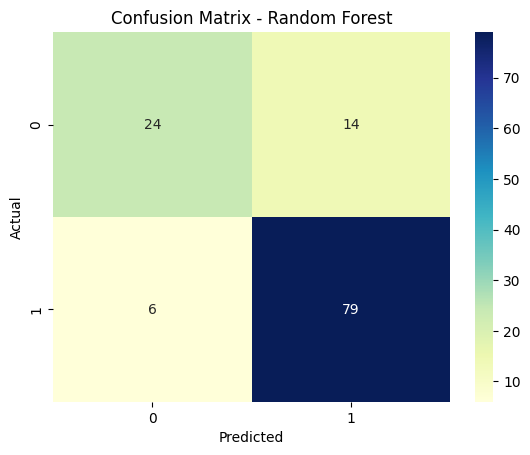

In [6]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate(model, name):
    print(f"\\n{name} Classification Report:")
    print(classification_report(y_test, model.predict(X_test)))
    print(f"{name} ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

evaluate(lr, "Logistic Regression")
evaluate(rf, "Random Forest")

# Confusion matrix visualization
cm = confusion_matrix(y_test, rf.predict(X_test))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Step 7: Save Model and Predict

Save model to reuse later in apps (e.g., Streamlit, FastAPI).


In [7]:
import joblib

joblib.dump(rf, "loan_approval_model.pkl")

# Reload and use for prediction
model = joblib.load("loan_approval_model.pkl")
sample = X_test.iloc[0:1]
prediction = model.predict(sample)[0]
print("Prediction:", "Approved ✅" if prediction == 1 else "Rejected ❌")

Prediction: Rejected ❌
